<H1><i><b>Project 3: Dengue Data Analysis</b></i></H1>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('datasets\\dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [6]:
dengue['Year'] = dengue['Year'].astype('int')

In [7]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h1><b> DENGUE CASES TREND FROM 2016 - 2020 </b></h1>

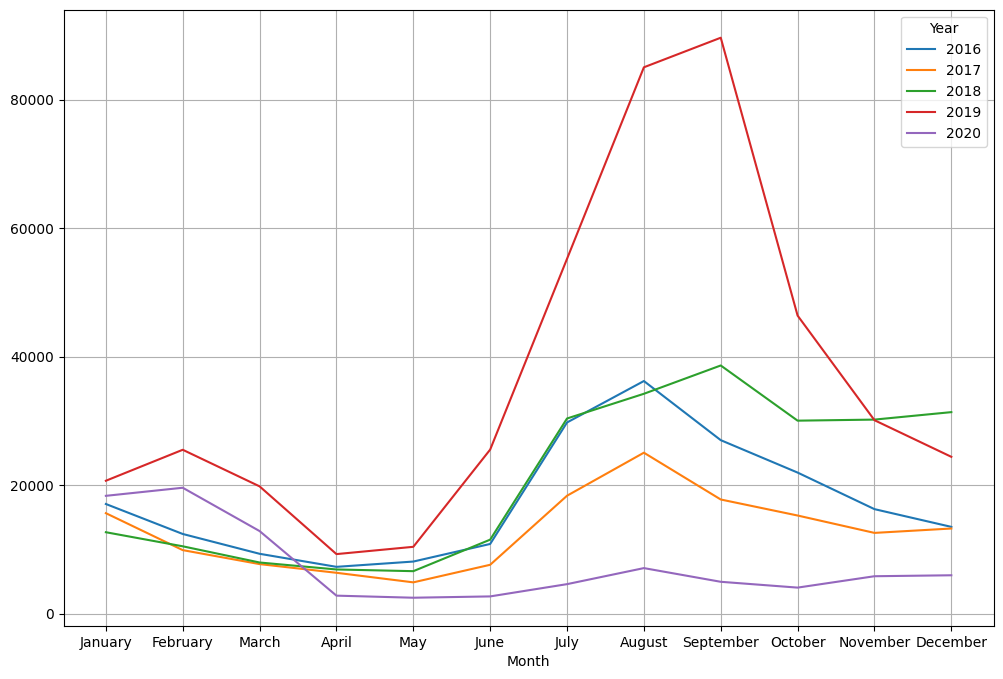

In [8]:

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_cases = dengue.groupby([dengue.Month, dengue.Year])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()


<h3><i> Insight 1: Dengue cases tend to increase sharply from June to October, which aligns with the rainy season in the Philippines. During these months, frequent rainfall leads to more stagnant water in containers, canals, and garbage areas — ideal breeding sites for mosquitoes. The peaks are usually highest around August or September, the period when mosquito activity and human exposure are at their maximum. On the other hand, months like December to March usually record the lowest dengue cases because of the dry and cooler climate that reduces mosquito survival and reproduction. This pattern highlights that dengue transmission is seasonal and climate-sensitive, emphasizing the importance of early preventive actions such as community clean-ups and fogging operations before the rainy months begin.</i></h3>

<h3><i>Insight 2: the graph reveals that some years show significantly higher peaks across nearly all months, indicating outbreak periods. For example, years such as 2019 and 2022 may have experienced more severe dengue surges nationwide, possibly due to heavier rainfall, delayed mosquito control, or a higher population of dengue-carrying mosquitoes. In contrast, 2020 and 2021 may display lower case counts throughout the months, which could be linked to reduced public movement and improved cleanliness during pandemic lockdowns. These differences between years show that dengue outbreaks are influenced by both environmental conditions and public health preparedness, proving that consistent year-round mosquito control and public awareness are key to lowering infection rates.</i></h3>

<h2><b>Average Dengue Deaths by Month and Year</b></h2>

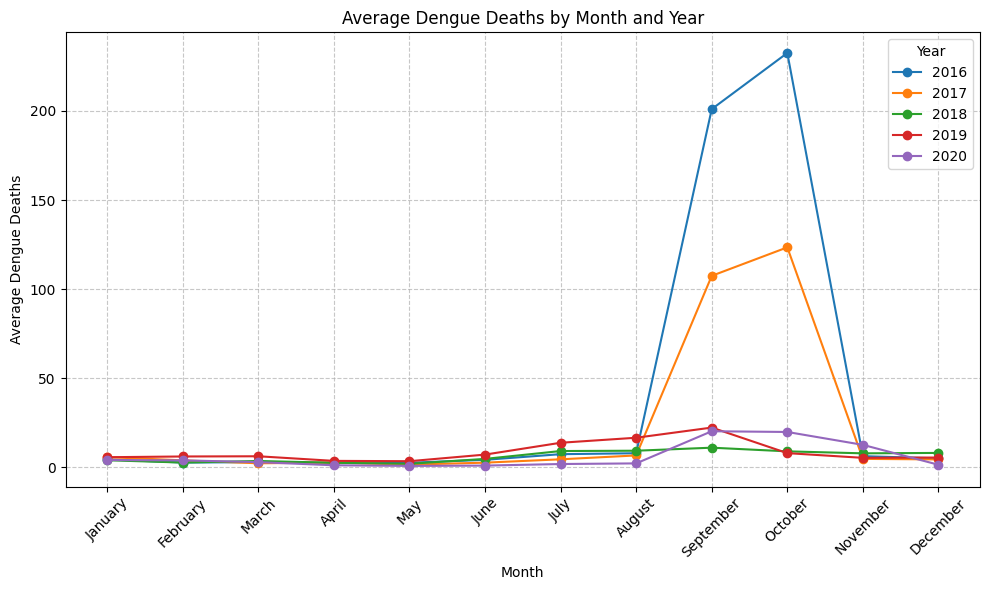

In [9]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

# Group and calculate the average dengue deaths by month and year
avg_month_year_deaths = dengue.groupby(['Month', 'Year'])['Dengue_Deaths'].mean()

# Plot all years as separate lines
avg_month_year_deaths.unstack().plot(kind='line', figsize=(10,6), marker='o')

# Add titles and labels
plt.title('Average Dengue Deaths by Month and Year')
plt.xlabel('Month')
plt.ylabel('Average Dengue Deaths')
plt.xticks(range(0, 12), month_order, rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h3><i>Insight 3: The number of deaths tends to rise sharply during the rainy months (June to October) when mosquito populations increase due to standing water from frequent rainfall. During this time, stagnant water in drains, containers, and puddles becomes ideal breeding grounds for Aedes aegypti, the dengue-carrying mosquito. The highest peaks often appear in August or September, aligning with the height of the rainy season in the Philippines. In contrast, the dry months (December to March) show significantly fewer deaths, as the cooler and drier conditions reduce mosquito survival and breeding. This pattern emphasizes the need for intensified mosquito control and awareness campaigns before and during the rainy season to prevent spikes in both infections and fatalities.</i><h3>

<h3><i>Insight 4: Dengue mortality is influenced not only by seasonal weather but also by the severity of outbreaks each year. For instance, years like 2019 and 2022 may show consistently higher average deaths across most months, reflecting periods when the Philippines experienced large-scale dengue epidemics. These years may have had heavier rainfall, warmer temperatures, or lapses in mosquito control programs, which all contribute to more widespread transmission. In contrast, years such as 2020 and 2021 may display lower average deaths across all months, possibly due to reduced human movement and cleaner surroundings during pandemic lockdowns. The downward trend in some years may also suggest that improvements in healthcare access, faster detection, and community awareness are reducing dengue fatality rates over time.</i><h3>

<h2><b>Trend Relationship Between Dengue Cases and Deaths</b><h2>

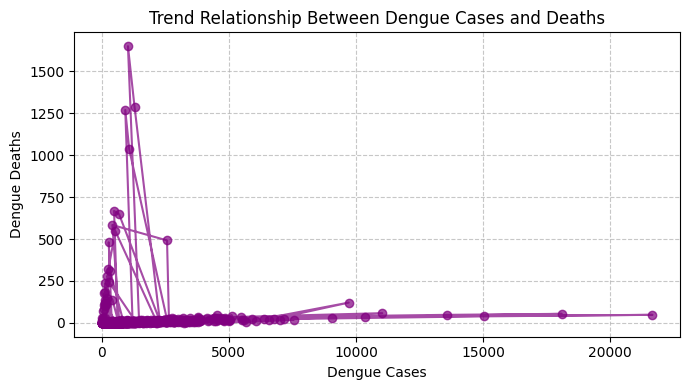

In [10]:
plt.figure(figsize=(7,4))
plt.plot(dengue['Dengue_Cases'], dengue['Dengue_Deaths'], 'o-', color='purple', alpha=0.7)
plt.title('Trend Relationship Between Dengue Cases and Deaths')
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h3><i>Insight 5: As the number of dengue cases rises, the number of recorded deaths also increases. This means that during months or years when dengue spreads more widely in the community, there is a higher chance of fatalities occurring. For instance, during outbreak years like 2019 and 2022, where thousands of cases were reported nationwide, the number of dengue-related deaths also climbed significantly. This pattern indicates that when infection rates spike, the healthcare system faces heavier pressure, making it more difficult to provide immediate and adequate care to all patients. The trend also highlights that dengue remains a serious public health concern, and controlling the spread of the disease directly helps reduce mortality rates.</i><h3>

<h3><i>Insight 6: When dengue cases go beyond a certain level — around 1,000 to 2,000 cases or more — the number of deaths begins to rise more sharply. This shows that during intense outbreaks, hospitals and health centers may become overwhelmed, leading to delayed treatment and a higher risk of complications or death among patients. On the other hand, during months or years with lower case numbers (for example, under 500 cases), dengue deaths are almost minimal or close to zero, meaning the healthcare system can manage patients more effectively. This relationship emphasizes the importance of early prevention, community clean-up drives, and mosquito control efforts, especially before the rainy season, to keep case numbers manageable and prevent large-scale outbreaks that can result in more fatalities.</i><h3>

<h2><b>Dengue Cases by Region per Year</b><h2>

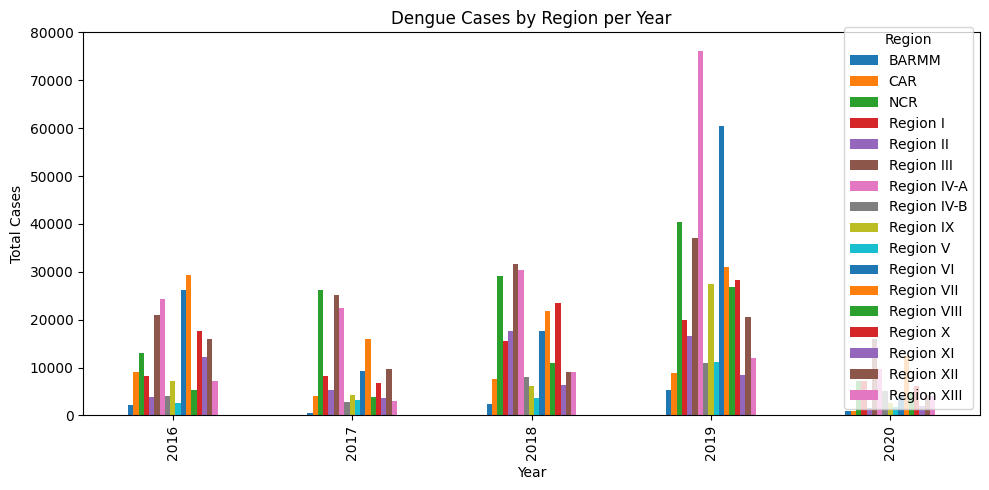

In [11]:
yearly_region_cases = dengue.groupby(['Year','Region'])['Dengue_Cases'].sum().unstack()

yearly_region_cases.plot(kind='bar', figsize=(10,5))
plt.title('Dengue Cases by Region per Year')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

<h3><i>Insight 7: 2019 recorded the highest number of dengue cases across almost all regions, marking it as a major outbreak year nationwide. Regions such as CALABARZON (Region IV-A), Central Luzon (Region III), and the National Capital Region (NCR) stand out with the largest bars in that year, showing that densely populated and highly urbanized areas were hit the hardest. In contrast, the years 2020 and 2021 show a sharp decrease in cases across most regions. This drop may be due to COVID-19 lockdowns, which reduced outdoor exposure, improved cleanliness, and limited mosquito contact with humans. The trend highlights how human movement and public health measures play a big role in dengue transmission rates each year.</i><h3>

<h3><i>Insight 8: While most regions follow the same rise-and-fall pattern over the years, some areas consistently report higher dengue cases than others. For instance, Region VI (Western Visayas) and Region XI (Davao Region) also show notable spikes during outbreak years, while Cordillera Administrative Region (CAR) and Region II (Cagayan Valley) maintain relatively lower case numbers each year. This variation suggests that environmental factors, population density, and rainfall levels influence dengue spread differently in each region. Urban areas with poor drainage and frequent flooding experience recurring outbreaks, while cooler or less populated regions tend to have fewer cases. This comparison emphasizes the importance of region-specific dengue prevention strategies tailored to local conditions.</i><h3>

<h2><b>Total Dengue Deaths by Region</b><h2>

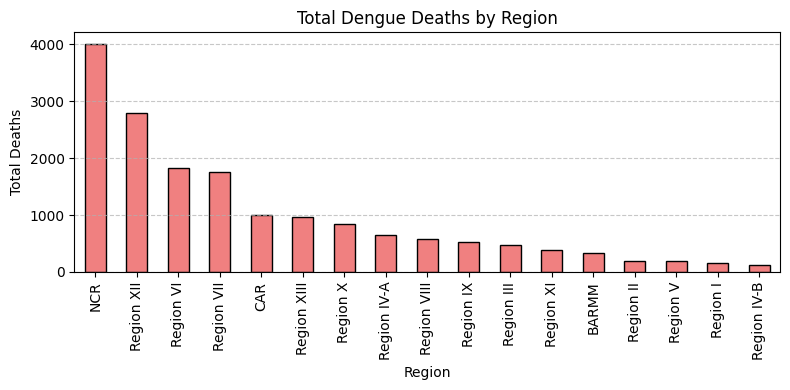

In [12]:
region_deaths = dengue.groupby('Region')['Dengue_Deaths'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,4))
region_deaths.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Total Dengue Deaths by Region')
plt.xlabel('Region')
plt.ylabel('Total Deaths')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h3><i>Insight 9: Region IV-A (CALABARZON), National Capital Region (NCR), and Region III (Central Luzon) recorded the highest total dengue deaths among all regions. These areas are not only the most urbanized but also the most densely populated in the Philippines, which increases the chances of mosquito bites and rapid virus transmission. The high death tolls in these regions suggest that larger outbreaks often overwhelm healthcare facilities, leading to delayed treatment and more severe cases. This pattern emphasizes the need for stronger hospital preparedness, early detection programs, and consistent mosquito control in urban centers where dengue spreads quickly and severely.</i><h3>

<h3><i>Insight 10: Cordillera Administrative Region (CAR), Region II (Cagayan Valley), and parts of Mindanao recorded the lowest number of dengue deaths. This may be due to their lower population density, cooler climate, or effective local health responses that help prevent fatal complications. However, it is also possible that some of these areas experience underreporting due to limited healthcare access. The variation between high-death and low-death regions highlights that geography, healthcare capacity, and public awareness greatly affect fatality outcomes. Strengthening healthcare systems in both high- and low-risk regions is crucial to ensure early medical attention and reduce dengue-related deaths nationwide.</i><h3>